In [620]:
import pandas as pd
from backbone import disparity_filter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [584]:
df = pd.read_csv('data/country_cls_sim.csv', index_col=0)

In [585]:
df=df.unstack().reset_index()

In [586]:
df.columns=['Source', 'Target', 'Weight'] # names that also Gephi likes

In [587]:
df = df[df.Source<df.Target]

In [588]:
df.Weight.describe()

count    17766.000000
mean         0.212613
std          0.065075
min          0.167445
25%          0.168715
50%          0.187407
75%          0.227243
max          0.651266
Name: Weight, dtype: float64

In [589]:
# df.Weight = (df.Weight-df.Weight.mean())/df.Weight.std()
# df.Weight = df.Weight-.5 # nope
df.Weight = ((df.Weight-df.Weight.min())/(df.Weight.max()-df.Weight.min()))


In [590]:
# df.to_csv('data/country_pairs_std.csv', index=False)


In [591]:
G = nx.from_pandas_edgelist(df=df, source='Source', target='Target', edge_attr='Weight')

In [592]:
alpha = 0.05
G1=disparity_filter(G, weight='Weight')
G2 = nx.Graph([(u, v, d) for u, v, d in G.edges(data=True) if G1.edges[u, v]['alpha'] < alpha])
print('alpha = %s' % alpha)
print('original: nodes = %s, edges = %s' % (G.number_of_nodes(), G.number_of_edges()))
print('backbone: nodes = %s, edges = %s' % (G2.number_of_nodes(), G2.number_of_edges()))
G=G2

alpha = 0.05
original: nodes = 189, edges = 17766
backbone: nodes = 188, edges = 1050


In [593]:
comms = nx.community.greedy_modularity_communities(G, weight='Weight')

In [594]:
nx.community.quality.modularity(G, communities=comms, weight='Weight')

0.631609288315413

In [595]:
comms

[frozenset({'Angola',
            'Antarctica',
            'Antigua and Barbuda',
            'Bahamas',
            'Belarus',
            'Belize',
            'Bermuda',
            'Bosnia and Herzegovina',
            'Brazil',
            'Brunei',
            'Bulgaria',
            'Burkina Faso',
            'Burundi',
            'Cambodia',
            'Cayman Islands',
            'Cook Islands',
            'Czech Republic',
            'Denmark',
            'Estonia',
            'Falkland Islands (Malvinas)',
            'Fiji',
            'French Polynesia',
            'Gabon',
            'Gambia',
            'Georgia',
            'Gibraltar',
            'Grenada',
            'Guam',
            'Guyana',
            'Indonesia',
            'Ivory Coast',
            'Kazakhstan',
            "Korea, Democratic People's Republic of",
            "Lao People's Democratic Republic",
            'Latvia',
            'Liberia',
            'Lithuania',
          

In [596]:
len(comms)

8

In [622]:
country2cluster={c:i for i, cc in enumerate(comms) for c in cc}

C:\Users\hide\AppData\Local\Temp\ipykernel_19096\3379547080.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


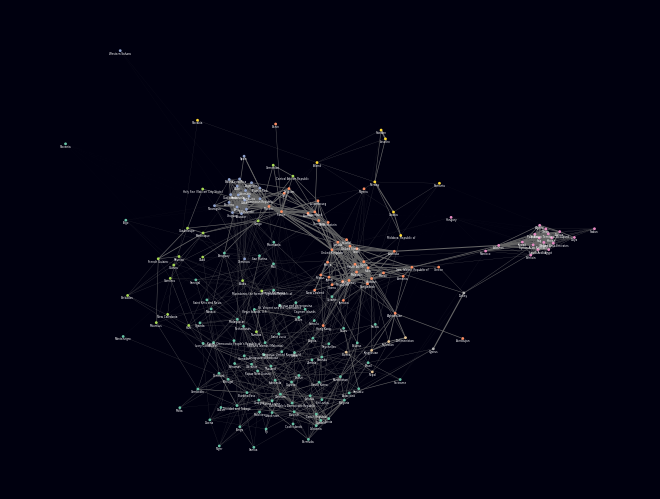

In [627]:
fig = plt.figure()
cmap = get_cmap("Set2", len(comms)).colors
# cmap = get_cmap("viridis", len(comms)).colors
# pos = nx.drawing.layout.spring_layout(G, weight='Weight', iterations=10000)
pos = nx.drawing.layout.fruchterman_reingold_layout(G, weight='Weight', iterations=10000)
weights = [d['Weight'] for u,v,d in G.edges(data=True)]
nx.draw(G, pos, node_size=1, edge_color='#666666', width=weights,
        node_color=[cmap[country2cluster[i]] for i in G.nodes()])
_=nx.draw_networkx_labels(G, pos, font_size=2, font_color='#FFFFFF', verticalalignment='top')
# plt.show()
fig.set_facecolor("#00000F")
plt.tight_layout()
plt.savefig("data/std_weights_backboned.png", format="PNG")
plt.savefig("data/std_weights_backboned.pdf", format="PDF")

In [598]:
nx.set_node_attributes(G, nx.betweenness_centrality(G=G, weight='Weight'), 'Betweenness')

In [599]:
nx.set_node_attributes(G, nx.pagerank(G=G, weight='Weight'), 'Pagerank')


In [600]:
sorted(G.nodes(), key=lambda n: G.nodes[n]['Pagerank'], reverse=True)[:10]

['United Kingdom',
 'Mexico',
 'France',
 'Philippines',
 'Pakistan',
 'South Africa',
 'Malaysia',
 'Venezuela',
 'Vietnam',
 'India']

In [601]:
G.nodes["France"]

{'Betweenness': 0.05117589557817262, 'Pagerank': 0.01663456311644897}

In [602]:
G.nodes["United States"]

{'Betweenness': 0.0, 'Pagerank': 0.009080465704174524}

In [603]:
G.nodes["Gabon"]

{'Betweenness': 0.041400724512678976, 'Pagerank': 0.0018077985359056207}

In [604]:
sorted(G.nodes(), key=lambda n: G.nodes[n]['Betweenness'], reverse=True)[:10]

['Slovenia',
 'Hungary',
 'Bosnia and Herzegovina',
 'Dominican Republic',
 'Senegal',
 'Dominica',
 'French Polynesia',
 "Korea, Democratic People's Republic of",
 'Mexico',
 'Panama']